In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston 
boston_data = load_boston()

In [3]:
data = pd.DataFrame(boston_data.data, columns= boston_data.feature_names)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
y = boston_data.target

In [6]:
# loading boston housing data from csv file
df = pd.read_csv('housing.data', delim_whitespace=True, header= None)
df.columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
            'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Brief Introduction to decision tree

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
# taking one feature
X = df[['LSTAT']].values

In [10]:
# defining decision tree with depth 5
tree = DecisionTreeRegressor(max_depth= 5)

In [11]:
# fit the tree
tree.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [12]:
sort_idx = X.flatten().argsort()

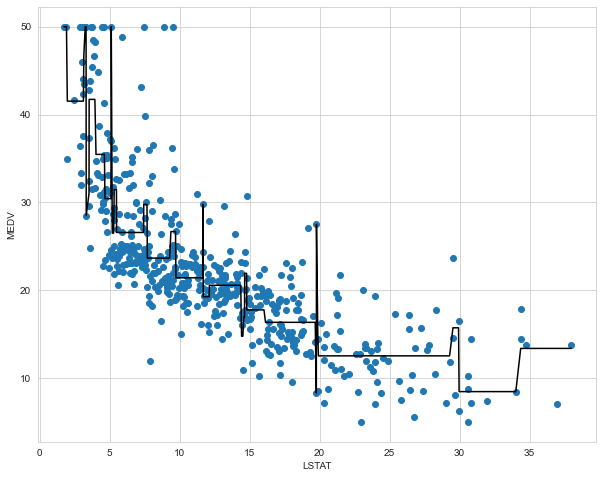

In [13]:
# plotting 
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx]);
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color= 'k');
plt.xlabel('LSTAT');
plt.ylabel('MEDV');

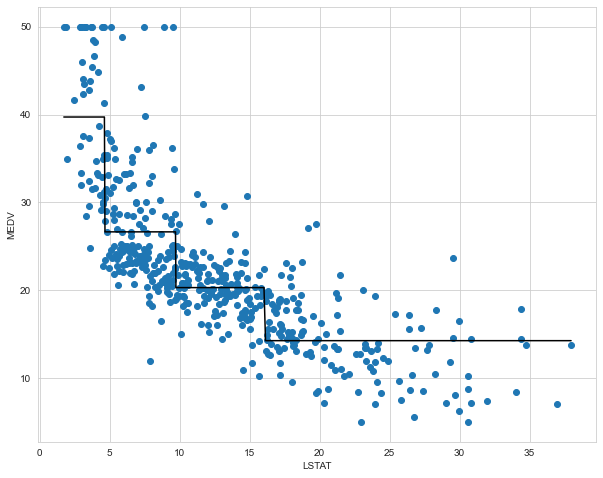

In [14]:
# tree using maxdepth= 2
tree_2 = DecisionTreeRegressor(max_depth= 2)
tree_2.fit(X, y)

# sorting 
sort_idx = X.flatten().argsort()

# ploting 
plt.figure(figsize= (10, 8));
plt.scatter(X[sort_idx], y[sort_idx]);
plt.plot(X[sort_idx], tree_2.predict(X[sort_idx]), color= 'k');
plt.xlabel('LSTAT');
plt.ylabel('MEDV');

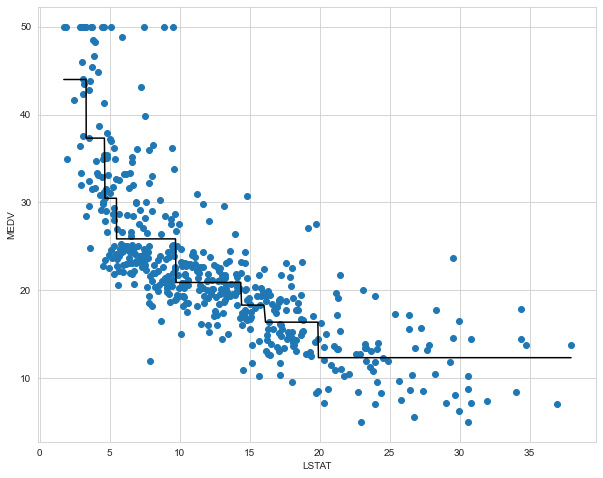

In [15]:
# tree using maxdepth= 3
tree_3 = DecisionTreeRegressor(max_depth= 3)
tree_3.fit(X, y)

# sorting 
sort_idx = X.flatten().argsort()

# ploting 
plt.figure(figsize= (10, 8));
plt.scatter(X[sort_idx], y[sort_idx]);
plt.plot(X[sort_idx], tree_3.predict(X[sort_idx]), color= 'k');
plt.xlabel('LSTAT');
plt.ylabel('MEDV');

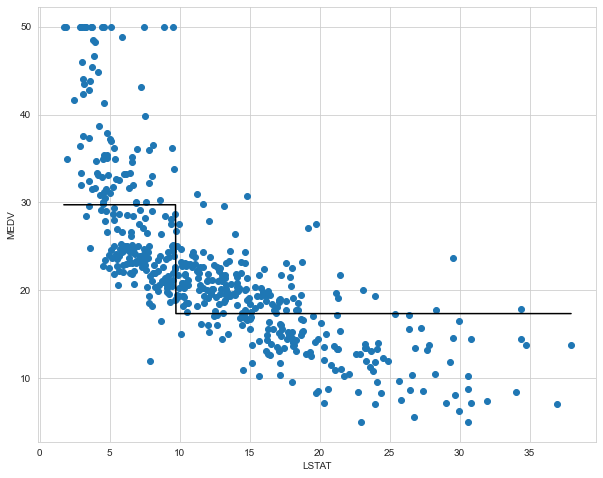

In [16]:
# tree using maxdepth= 1
tree_1 = DecisionTreeRegressor(max_depth= 1)
tree_1.fit(X, y)

# sorting 
sort_idx = X.flatten().argsort()

# ploting 
plt.figure(figsize= (10, 8));
plt.scatter(X[sort_idx], y[sort_idx]);
plt.plot(X[sort_idx], tree_1.predict(X[sort_idx]), color= 'k');
plt.xlabel('LSTAT');
plt.ylabel('MEDV');

# Breif Introduction to Random Forest

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
X = df.values

In [19]:
X.shape

(506, 14)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                                                   test_size= 0.3, 
                                                   random_state = 42)

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
# instantiate the model
forest = RandomForestRegressor(n_estimators= 500, criterion='mse',
                              random_state= 42, n_jobs= -1)

In [23]:
# fit the model 
forest.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [24]:
# prediction for train anad test data
train_pred = forest.predict(X_train)
test_pred = forest.predict(X_test)

In [25]:
# displaying training and test erros

print("MSE train: {0:.4f}, test: {1:.4f}".\
     format(mean_squared_error(Y_train, train_pred),
           mean_squared_error(Y_test, test_pred)))

MSE train: 0.0088, test: 0.0228


In [26]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
     format(r2_score(Y_train, train_pred),
           r2_score(Y_test, test_pred)))

R^2 train: 0.9999, test: 0.9997


# Breif Introduction to AdaBoost

In [27]:
from sklearn.ensemble import AdaBoostRegressor

In [28]:
# instantiate adaboost
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth= 4),
                       n_estimators= 500, random_state= 42)

In [29]:
# fit the model 
ada.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=500, random_state=42)

In [30]:
train_pred_ada = ada.predict(X_train)
test_pred_ada = ada.predict(X_test)

In [31]:
# displaying MSE for train and test data 
print("MSE Train: {0:.4f}, Test{1:.4f}".\
     format(mean_squared_error(Y_train, train_pred_ada),
           mean_squared_error(Y_test, test_pred_ada)))

MSE Train: 0.0364, Test0.0607


In [32]:
# Displaying R2 Score 
print("R^2 Score train: {0:.4f}, test{1:.4f}".\
     format(r2_score(Y_train, train_pred_ada),
           r2_score(Y_test, test_pred_ada)))

R^2 Score train: 0.9996, test0.9992


# Revisiting feature importance 

13 features, visualize which feature is more important, How can we do this with scikit-learn

In [33]:
# gettting feature importance 
ada.feature_importances_

array([2.17109323e-04, 0.00000000e+00, 4.42849647e-06, 8.15142928e-07,
       3.14615224e-05, 4.41286727e-05, 2.59999474e-05, 2.42078914e-05,
       2.07465496e-05, 2.89331800e-05, 3.52062791e-05, 4.14975482e-05,
       1.00187074e-05, 9.99515447e-01])

In [34]:
# getting columns imformation 
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [35]:
# making a dataframe for feature importance with coresponding columns
result = pd.DataFrame(ada.feature_importances_, df.columns)
result.columns= ['feature']

In [36]:
# sorting 
result.sort_values(by= 'feature', ascending= False)

,feature
MEDV,9.995154e-01
CRIM,2.171093e-04
RM,4.412867e-05
B,4.149755e-05
PTRATIO,3.520628e-05
NOX,3.146152e-05
TAX,2.893318e-05
AGE,2.599995e-05
DIS,2.420789e-05
RAD,2.074655e-05


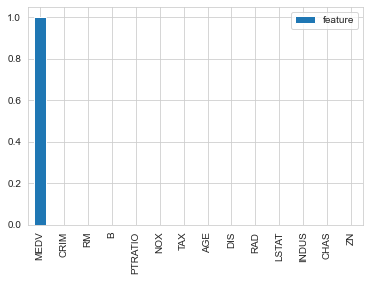

In [37]:
result.sort_values(by= 'feature', ascending= False).plot(kind= 'bar')